<h1> dataset_info:
  </h1>
  
  - features:
      - name: text
      dtype: string
      - name: label
      dtype: int64
      - name: __index_level_0__
      - dtype: int64
- splits:
    - name: train
      num_bytes: 3698636
      num_examples: 38213
    - name: validation
      num_bytes: 414977
      num_examples: 4246

- Labels:

    - 1 : biased (opinions, emotional responses)
    - 0 : unbiased (neutral Tone)

In [71]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from datasets import load_dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

<div class="alert alert-block alert-danger">

If you re-execute below you will have an issue. Need to clear cache:
    `rm -rf ~/.cache/huggingface/datasets/`

In [ ]:
ds = load_dataset("pranjali97/Bias-detection-combined")

Generating train split:   0%|          | 0/38213 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4246 [00:00<?, ? examples/s]

In [93]:
df = ds['train'].to_pandas()
# df_true = ds['validation'].to_pandas()

In [94]:
df.describe()

,label,__index_level_0__
count,38213.000000,38213.000000
mean,0.453432,11091.391280
std,0.497833,7820.587123
min,0.000000,0.000000
25%,0.000000,4512.000000
50%,0.000000,9811.000000
75%,1.000000,17035.000000
max,1.000000,27667.000000


In [95]:
df.head(40
        )

,text,label,__index_level_0__
0,"wow that's pretty awesome , i've seen miley cy...",1,2712
1,yes i've and they're to die for,0,20094
2,vera died . i need a new honda . you drive ?,1,9395
3,i love playing guitar . i'm very good in that .,1,4060
4,These people in the MSM are DISGUSTING fla...,0,1310
5,yummy sounds really good ! ca not wait ! you f...,0,22748
6,"i'm bruno , how about yours ?",1,554
7,"() Ok lets play this game. Which side"" is op...",1,7518
8,"yes , five . always loved babies . so are you ...",1,7509
9,We are in this mess because people are stup...,0,6599


handling whitespaces

In [54]:
df = df[df['text'].str.strip() != ""]


<div class="alert alert-block alert-success">
VADER (Valence Aware dict and sentiment reasoner), lexicon approach

In [55]:
# analyzer = SentimentIntensityAnalyzer()
# def sentiment_classification(df):
#     comp_scores = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
#     return np.where(comp_scores >= 0.05, "1", np.where(comp_scores <= -0.05, "-1", "0"))

# df['predictions'] = sentiment_classification(df)

In [56]:
# df['predictions'].head(20)

In [57]:
# def sentiment_classification(df):
#     vectorizer = TfidfVectorizer(stop_words='english')
#     Tfidf_features = vectorizer.fit_transform(df["text"])
#     feature_names = vectorizer.get_feature_names_out()
    
#     chi_scores , _ =chi2(Tfidf_features, df['label'])
#     word_import = list(zip(feature_names, chi_scores))
    
#     sorted_words = sorted(word_import, key =lambda x: x[1], reverse=True)[:10]
#     bias_dict = {word:score for word, score in sorted_words}
    
#     return bias_dict


In [58]:
# def compute_bias_score(text, bias_dict):
#     words = text.lower().split()  # Tokenize text
#     return sum(bias_dict.get(word, 0) for word in words)  

#     # Add "bias_score" column to the DataFrame
#     df["bias_score"] = df["text"].apply(calculate_bias_score)

In [103]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
Tfidf_features = vectorizer.fit_transform(df["text"])
feature_names = vectorizer.get_feature_names_out()
    
chi_scores, _ = chi2(Tfidf_features, df['label'])
word_import = list(zip(feature_names, chi_scores))
    
sorted_words = sorted(word_import, key=lambda x: x[1], reverse=True)

word_bias_scores = {word: score for word, score in sorted_words}


def compute_bias_score(text):
    """Computes a bias score for a given text using extracted bias-indicating words."""
    words = text.lower().split()  # Tokenize text
    return sum(word_bias_scores.get(word, 0) for word in words)  


df["bias"] = df['text'].apply(compute_bias_score)


model = LogisticRegression()
model.fit(Tfidf_features, df["label"])
df["predicted_lr"] = model.predict(Tfidf_features)


accuracy_lr = accuracy_score(df["label"], df["predicted_label_lr"])
classification_lr = classification_report(df["label"], df["predicted_label_lr"])

print(f"Accuracy with Logistic Regression on Bias Features: {accuracy_lr:.2f}")
print("\nClassification Report with Logistic Regression:\n", classification_lr)

Accuracy with Logistic Regression on Bias Features: 0.88

Classification Report with Logistic Regression:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     20886
           1       0.92      0.81      0.86     17327

    accuracy                           0.88     38213
   macro avg       0.89      0.88      0.88     38213
weighted avg       0.89      0.88      0.88     38213



In [97]:
cm = confusion_matrix(df["label"], df["predicted_label_lr"])

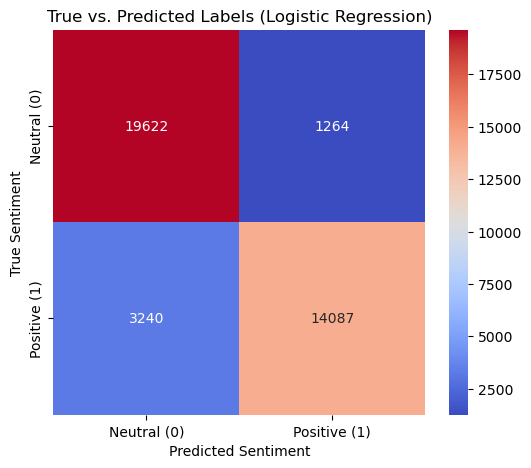

In [104]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Neutral (0)", "Positive (1)"],
            yticklabels=["Neutral (0)", "Positive (1)"])
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.title("True vs. Predicted Labels (Logistic Regression)")
plt.show()